In [1]:
using Revise, Pkg, Plots
gr(fmt = :png)
pkg"activate ."
pkg"instantiate"
pkg"precompile"
using PerlaTonettiWaugh, Parameters, Sundials

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Precompiling project...


# Steady states

## Stationary Solution

Set up parameters and find the corresponding stationary solution:

In [2]:
z_ex = settings_simple().z_ex
stationary_sol = stationary_numerical_simple(params_simple(), z_ex)

(g = 0.02080684556400637, v = [34.7725, 34.5912, 34.4124, 34.2363, 34.0628, 33.8917, 33.7231, 33.557, 33.3933, 33.232  …  22.236, 22.2308, 22.2276, 22.2256, 22.2244, 22.2236, 22.2231, 22.2226, 22.2174, 22.079])

# Transition dynamics

Setup for optimizer:

In [3]:
g_T = stationary_sol.g
params_transition = params_simple(r = t -> (0.05 - 1e-02 * (1 - t / 100.0)), π = (t, x) -> 1)

ω = ω_weights(z_ex, params_transition.θ, params_transition.ξ);

settings = merge(settings_simple(), (g = t -> g_T,))

(z_ex = [0.0, 0.00526316, 0.0105263, 0.0157895, 0.0210526, 0.0263158, 0.0315789, 0.0368421, 0.0421053, 0.0473684  …  3.10526, 3.31579, 3.52632, 3.73684, 3.94737, 4.15789, 4.36842, 4.57895, 4.78947, 5.0], T = 100.0, iterations = 1000, t_grid = 0.0:1.7543859649122806:100.0, g = getfield(Main, Symbol("##7#8"))())

Find the corresponding solution:

In [4]:
daeprob = simpleDAE(params_transition, settings)

DAEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (100.0, 0.0)
u0: [34.7725, 34.5912, 34.4124, 34.2363, 34.0628, 33.8917, 33.7231, 33.557, 33.3933, 33.232  …  22.2308, 22.2276, 22.2256, 22.2244, 22.2236, 22.2231, 22.2226, 22.2174, 22.079, 0.0208068]
du0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [5]:
@time residuals, v_ts, g_ts = solve_simple_dae(daeprob, params_transition.x, ω, IDA(), settings.t_grid);

  3.842409 seconds (12.17 M allocations: 619.314 MiB, 12.95% gc time)


# Plots

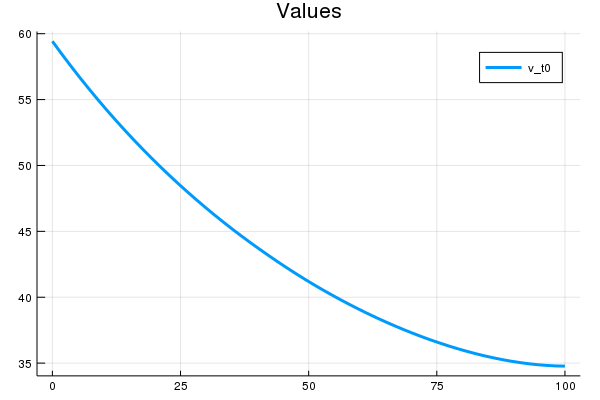

In [6]:
ts = plot(settings.t_grid, v_ts[1,:], label = "v_t0", lw = 3, title = "Values")

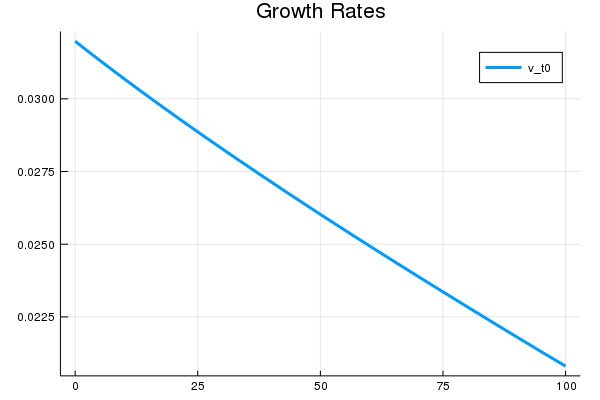

In [7]:
ts = plot(settings.t_grid, g_ts[1:end], label = "v_t0", lw = 3, title = "Growth Rates")

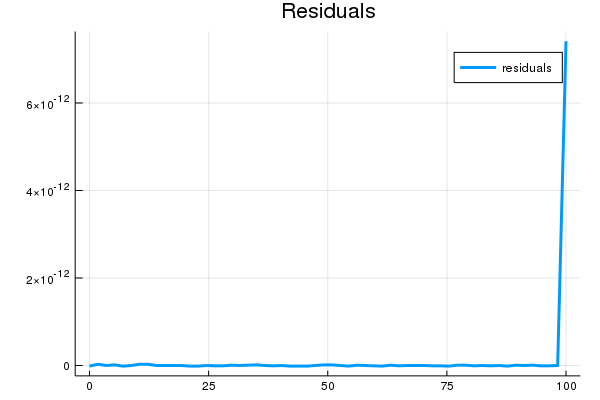

In [8]:
ts = plot(settings.t_grid, residuals, label = "residuals", lw = 3, title = "Residuals")

In [9]:
residuals[end]

7.410960733977845e-12